In [194]:
import pandas as pd
import json
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [35]:
df = pd.read_csv("""us events ad_revenue filtered 03.02-07.02.csv""")

In [36]:
df.head()

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,1644155969,wifi,Verizon,US,Charlotte
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,1644156564,wifi,T-Mobile,US,Cocoa
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN


In [37]:
df['ej'] = df.event_json.apply(lambda x: json.loads(x))

In [38]:
df2 = pd.json_normalize(df['ej'])
df2

,ad_type,placement,view_index,session_view_index,cur_ticks,session_length,revenue,ads_ltv,ecpm_sma,normalized_ecpm_sma,value,currency,ad_country_code,network_name,ad_unit_id,ad_network_placement,creativeId
0,banner,,1,0,637795729492245130,705.88070,0.000510,0.487877,0.511508,0.511508,0.000510,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CJ3XirfD5vUCFYPnKAUdG3MOYQ
1,banner,,1,0,637795729659949790,722.65120,0.000510,0.488387,0.511389,0.511389,0.000510,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CNa-lL_D5vUCFZrpKAUdU2QBDQ
2,banner,,1,0,637796515863735930,431.81290,0.002386,0.678479,0.928597,0.928597,0.002386,USD,US,APPLOVIN_EXCHANGE,64c6b1114ea8c1cc,banner_regular,pandora-58
3,int,next_level,1,1,637797353426827330,125.94960,0.013894,0.013894,13.782633,13.893784,0.013894,USD,US,AppLovin,3ab7705b07ebb75f,inter_regular,13045364
4,banner,,1,0,637797357392197840,12.71129,0.006828,0.060571,1.660282,1.660282,0.006828,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/6197324251,CMTi5e-h6_UCFUdVwQodt9EIMw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860074,banner,,1,0,637794449687371810,474.15260,0.000020,1.007506,0.080914,0.080914,0.000020,USD,US,APPLOVIN_EXCHANGE,64c6b1114ea8c1cc,banner_regular,165277
860075,banner,,1,0,637794223717667630,10.89967,0.006740,0.277541,3.379858,3.379858,0.006740,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/6197324251,CMeYrb2S4vUCFZWVyAodrPYHvA
860076,banner,,1,0,637794223868486920,25.97572,0.002780,0.280321,3.319878,3.319878,0.002780,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/4884242584,CNrdyMCS4vUCFRNXcgodTqsMOA
860077,banner,,1,0,637794223980531730,37.18013,0.002780,0.283101,3.265896,3.265896,0.002780,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/4884242584,CJnr0ciS4vUCFQ7HhwodgC8HVw


In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860079 entries, 0 to 860078
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ad_type               860079 non-null  object 
 1   placement             860079 non-null  object 
 2   view_index            860079 non-null  int64  
 3   session_view_index    860079 non-null  int64  
 4   cur_ticks             860079 non-null  int64  
 5   session_length        860079 non-null  float64
 6   revenue               860079 non-null  float64
 7   ads_ltv               860079 non-null  float64
 8   ecpm_sma              860079 non-null  float64
 9   normalized_ecpm_sma   860079 non-null  float64
 10  value                 860079 non-null  float64
 11  currency              860079 non-null  object 
 12  ad_country_code       860079 non-null  object 
 13  network_name          860079 non-null  object 
 14  ad_unit_id            860079 non-null  object 
 15  

In [40]:
df = pd.concat([df, df2], axis=1)

In [206]:
#df.to_csv('mod_us_events_ad_revenue.csv')

<AxesSubplot:>

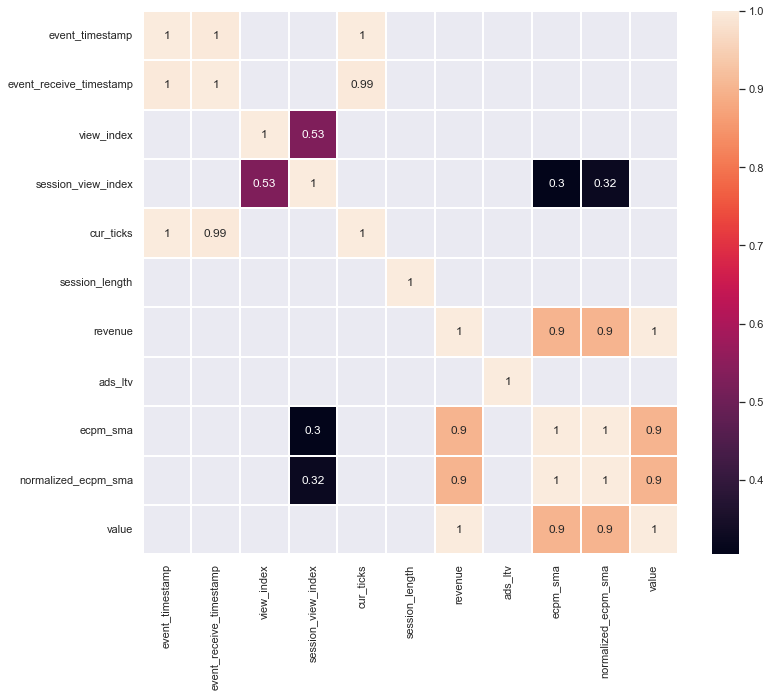

In [42]:
corr_matr = df.corr()
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(corr_matr[corr_matr>=0.3], annot=True, linewidths=0.1)

В ТЗ сказано, что "revenue – доход от конкретного показа рекламы (eCPM = revenue * 1000)". По таблице этого не видно - слишком большая погрешность. Матрица корреляций показывает, что есть очень сильая зависимость между revenue и ecpm_sma или normalized_ecpm_sma. Есть, вероятно, какая-то неточность данных или нелинейность, но я ее пока не ищу. В качестве показателя eCMP возьмем revenue * 1000.

Сначала уберем кажущееся лишним (к этому можно вернуться позже):

In [44]:
df.drop(['event_timestamp',
         'event_receive_timestamp',
         'view_index',
         'session_view_index',
         'cur_ticks'],
        axis=1, inplace=True)

Теперь добавим столбец eCPM. В исходных данных есть строки, где revenue = 0 и при этом ecpm_sma != 0. Не уверена насчет корректности действий, но для дальнейшей визуализации необходимо это убрать. Полагаю, не хватило знаков после запятой, чтобы передать revenue. Заменим 0.00 на 0.000001.

Также добавим столбец час и дата (для построения графика распределения по времени суток)

In [58]:
df['eCPM'] = df['revenue'].apply(lambda x: x if x > 0 else 0.000001) * 1000
df['event_datetime'] = pd.to_datetime(df['event_datetime'])
df['hour'] = df['event_datetime'].dt.hour
df['date'] = df['event_datetime'].dt.date

In [208]:
df_by_user = df.groupby(['profile_id', 'ad_type', 'city', 'os_version'], as_index=False).mean()
df_by_user_sum = df.groupby(['profile_id', 'ad_type', 'city', 'os_version'], as_index=False).sum()

In [209]:
def make_ad_group(df, ad_type):
    return df[df['ad_type'] == ad_type]

# Начнем

Для начала посмотрим глазами, каковы распределения средних по eCPM для разных типов рекламы:

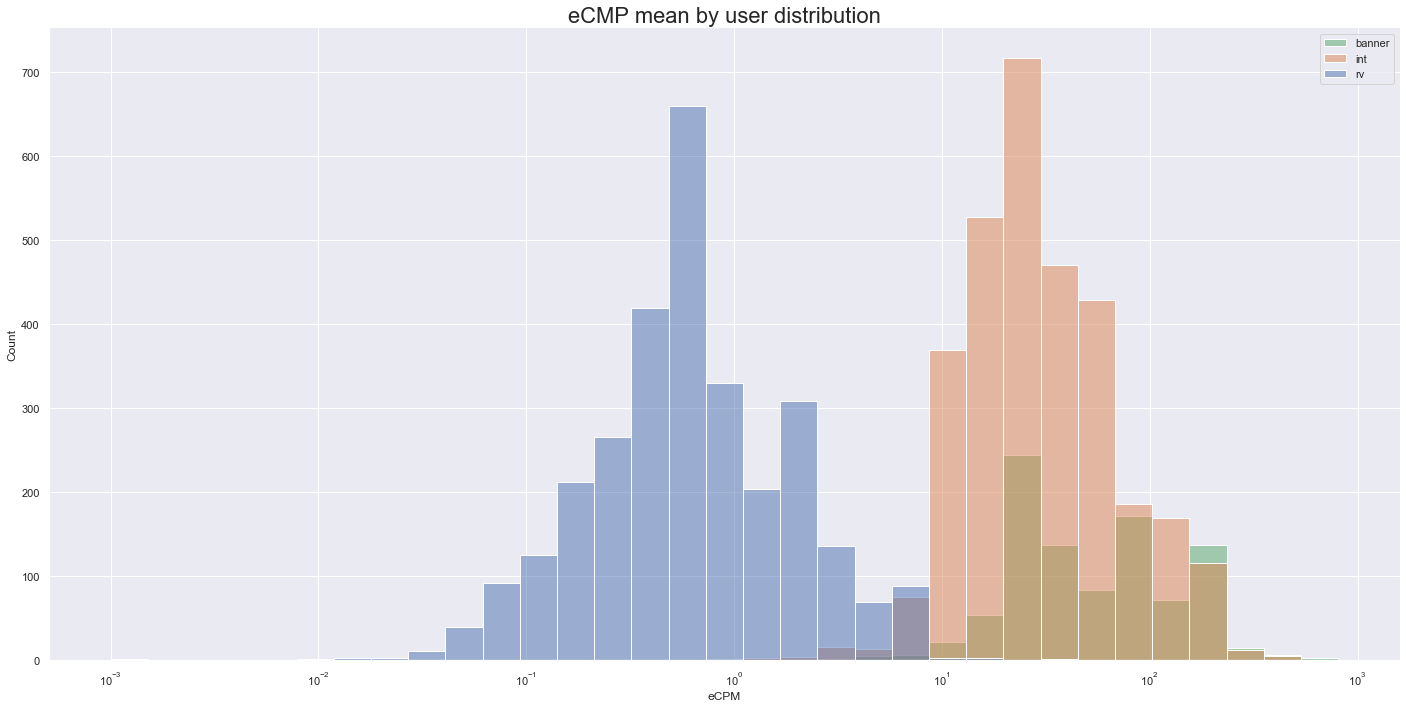

In [171]:
df_banner = make_ad_group(df_by_user, 'banner')
df_int = make_ad_group(df_by_user, 'int')
df_rv = make_ad_group(df_by_user, 'rv')

df_banner_sum = make_ad_group(df_by_user_sum, 'banner')
df_int_sum = make_ad_group(df_by_user_sum, 'int')
df_rv_sum = make_ad_group(df_by_user_sum, 'rv')

matplotlib.rcParams.update({'font.size': 22})

sns.displot(data=df_by_user,
            x='eCPM',
            hue='ad_type',
            log_scale=True,
            height=10,
            aspect=2,
            legend=False)

plt.title('eCMP mean by user distribution', fontdict={'size':22})
plt.legend(['banner', 'int', 'rv'])
plt.show()

Очевидно, полноэкранная реклама приносит больше дохода. Распределения int и rv похожи по форме купола, но средние сильно разнесены. График не совсем явно отображает данные, зато видно распределение.

Можно посмотреть сколько суммарно принес каждый тип рекламы:

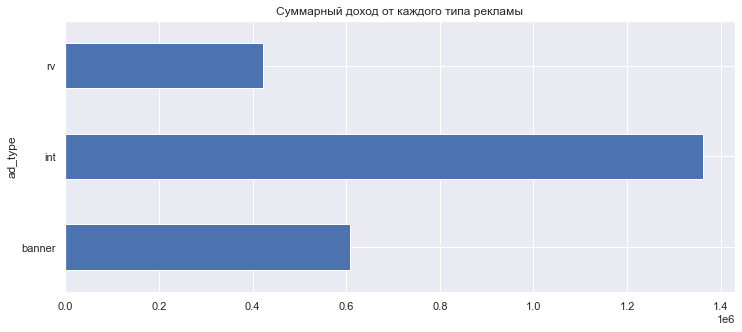

In [116]:
sns.set(rc={'figure.figsize':(12, 5)})
df.groupby('ad_type')['eCPM'].sum().plot(kind='barh')
plt.title('Суммарный доход от каждого типа рекламы')
plt.show()

Хоть rv реклама и довольно часто используется юзерами, но видно, что она все равно приносит меньше дохода, хоть и сравнимо с баннерной рекламой.

Рассмотрим самый прибыльный тип:
# Int

Разберемся, есть ли какие-либо различия в средних по городам и версиям операционных систем

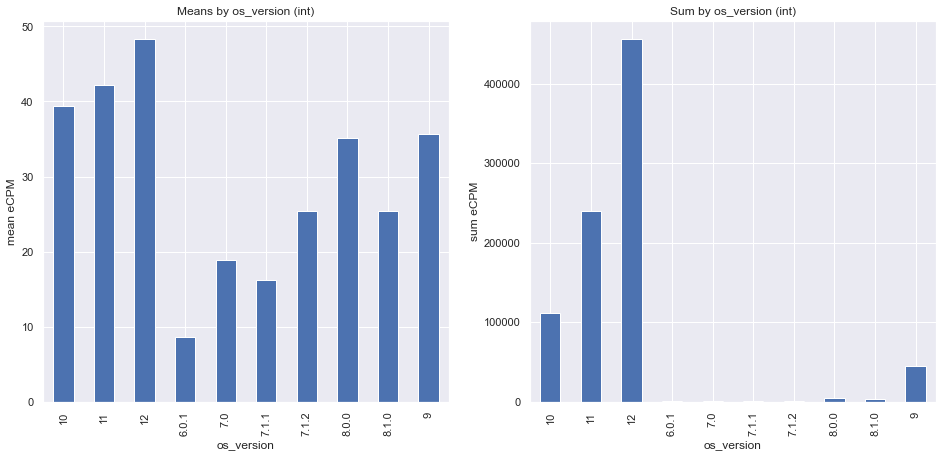

In [176]:
def show_means_by_os(df: pd.DataFrame, df_sum: pd.DataFrame, ad_type: str):
    sns.set(rc={'figure.figsize': (16, 7)})

    plt.subplot(1, 2, 1)
    df.groupby('os_version')['eCPM'].mean().plot(kind='bar')
    plt.title('Means by os_version (' + ad_type + ')')
    plt.ylabel('mean eCPM')

    plt.subplot(1, 2, 2)
    df_sum.groupby('os_version')['eCPM'].sum().plot(kind='bar')
    plt.title('Sum by os_version (' + ad_type + ')')
    plt.ylabel('sum eCPM')

    plt.show()

show_means_by_os(df_int, df_int_sum, 'int')

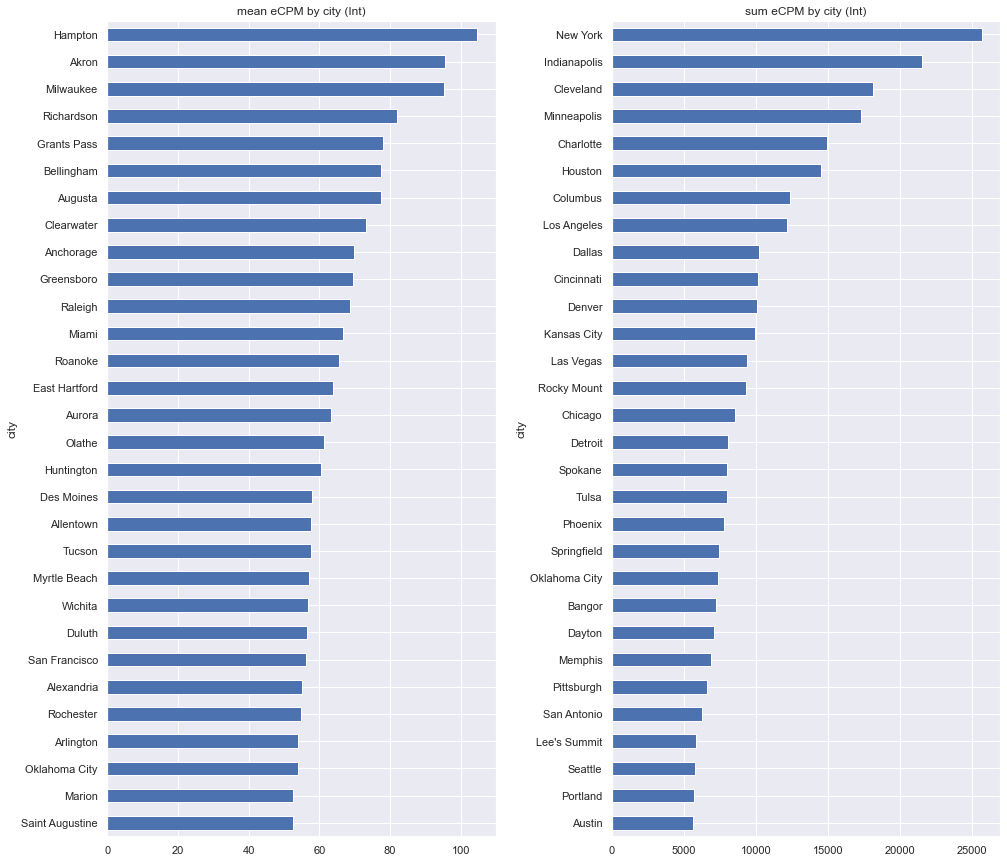

In [188]:
def show_means_by_city(df: pd.DataFrame, df_sum: pd.DataFrame, ad_type: str):

    city_counts = df.groupby('city', as_index=False).count()
    city_counts = city_counts[['city', 'ads_ltv']]

    df_city = df.merge(city_counts, on='city', how='right')
    df_city = df_city.rename(columns={'ads_ltv_x': 'ads_ltv', 'ads_ltv_y': 'city_count'})
    df_city = df_city.loc[df_city['city_count'] > 3]

    sns.set(rc={'figure.figsize':(16, 15)})

    plt.subplot(121)
    df2 = df_city.groupby('city').mean().sort_values('eCMP')[-30:]
    df2.eCPM.plot(kind='barh')
    plt.title('mean eCPM by city (' + ad_type +')')

    plt.subplot(122)
    df3 = df_sum.groupby('city').sum().sort_values('eCMP')[-30:]
    df3.eCPM.plot(kind='barh')
    plt.title('sum eCPM by city (' + ad_type +')')

    plt.subplots_adjust(wspace=0.3)

    plt.show()

show_means_by_city(df_int, df_int_sum, 'Int')

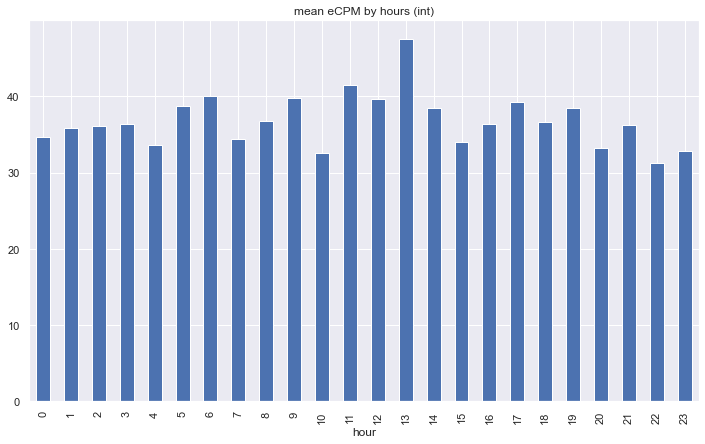

In [160]:
def show_time_dependence(df: pd.DataFrame, col: str):
    df_time = df[df['ad_type'] == col].groupby(['hour']).mean()
    sns.set(rc={'figure.figsize': (12, 7)})
    df_time.sort_values(['hour']).eCPM.plot(kind='bar')
    plt.title('mean eCPM by hours ('+ col + ')')
    plt.show()

show_time_dependence(df, 'int')

#### Теперь banner

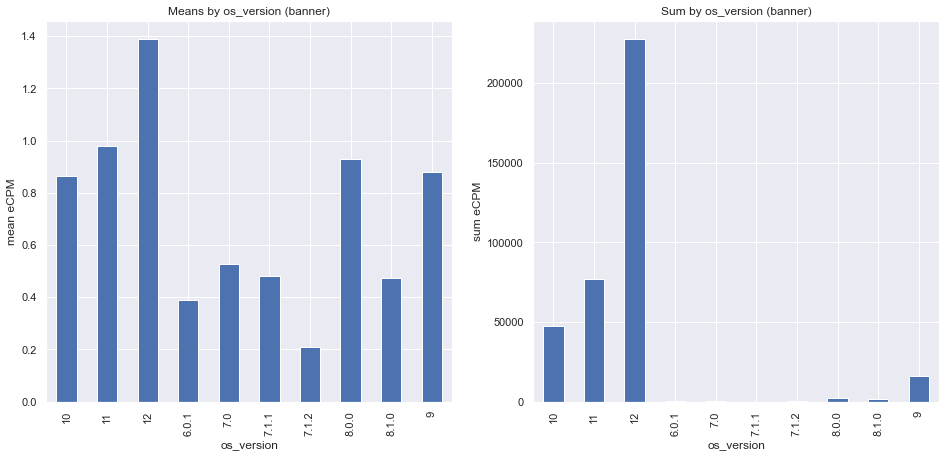

In [173]:
show_means_by_os(df_banner, df_banner_sum, 'banner')

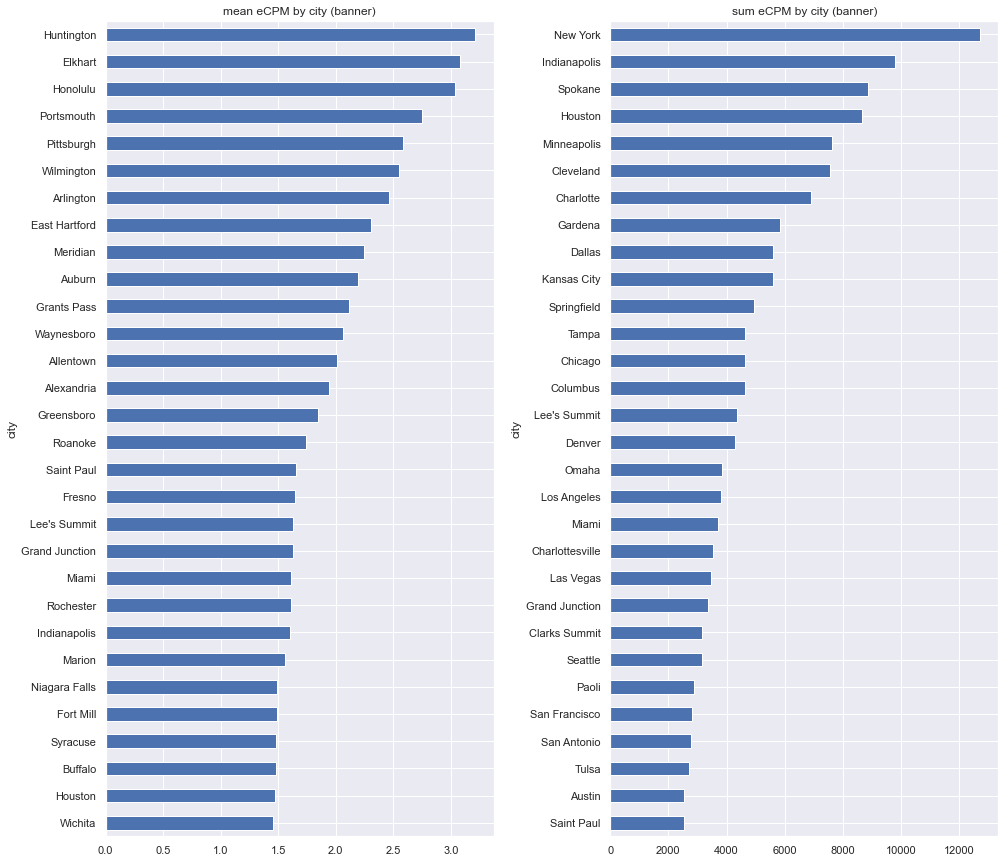

In [189]:
show_means_by_city(df_banner, df_banner_sum, 'banner')

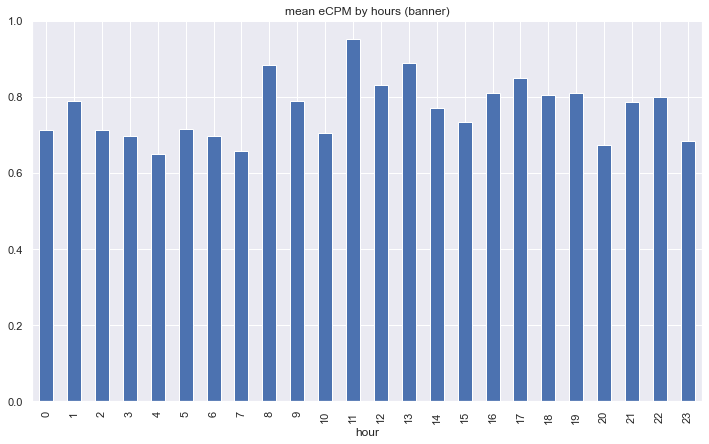

In [162]:
show_time_dependence(df, 'banner')

#### И, наконец, rv

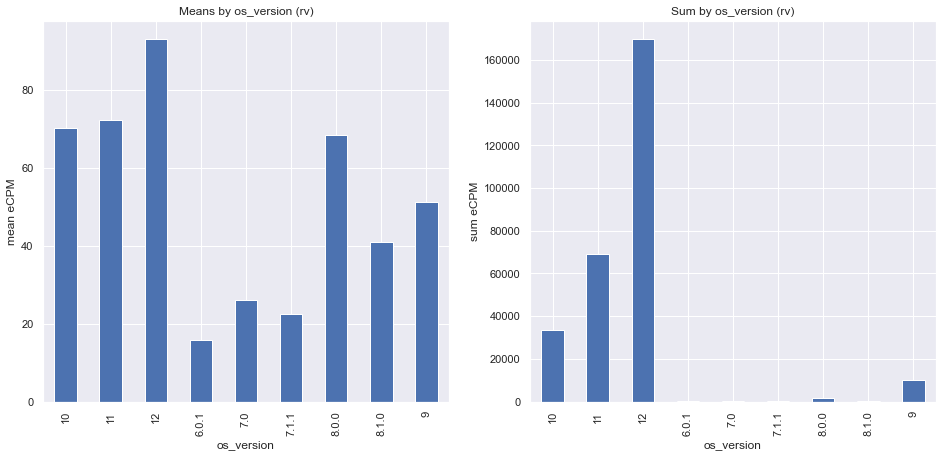

In [192]:
show_means_by_os(df_rv, df_rv_sum, 'rv')

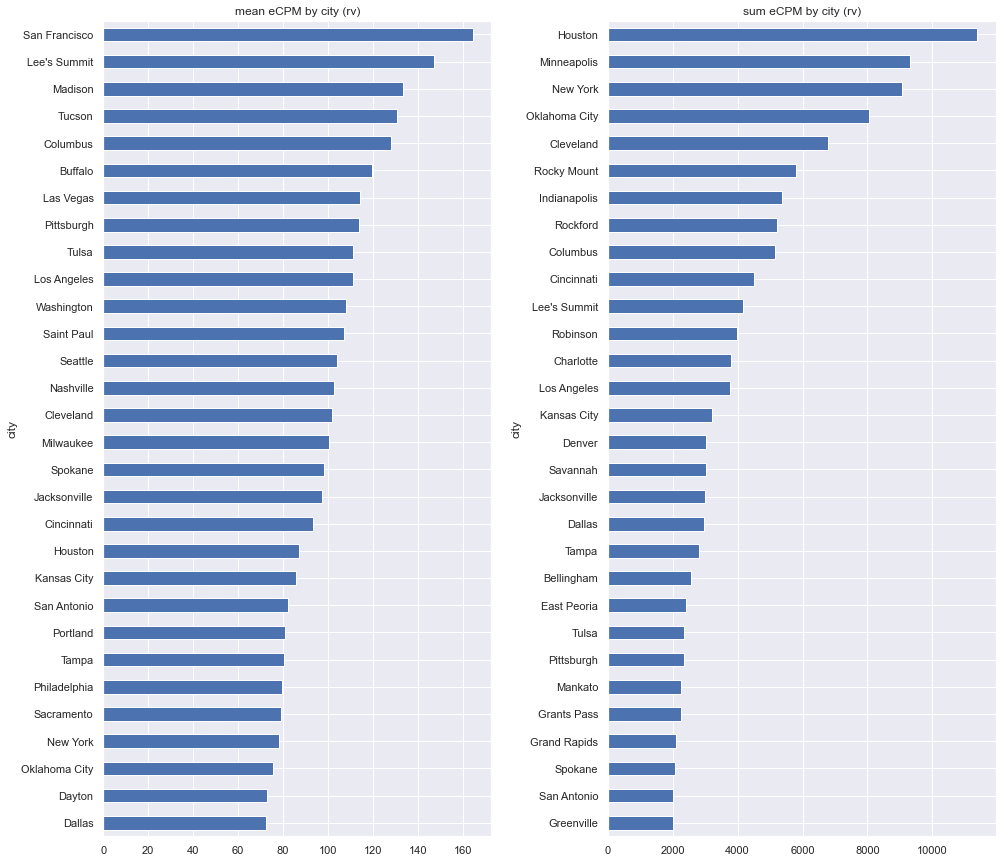

In [190]:
show_means_by_city(df_rv, df_rv_sum, 'rv')

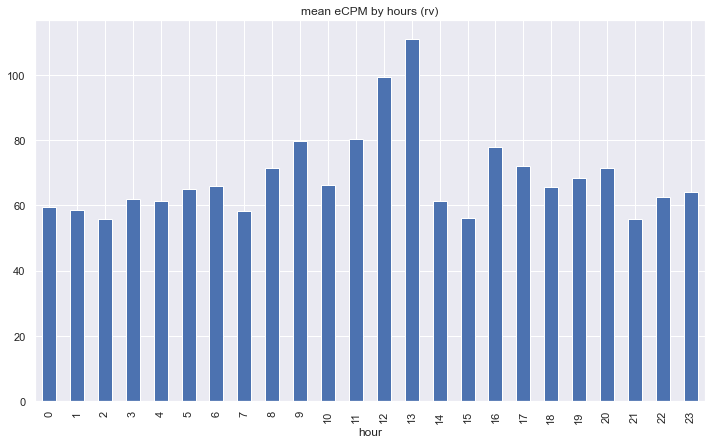

In [165]:
show_time_dependence(df, 'rv')

# Распределение средних по срезам

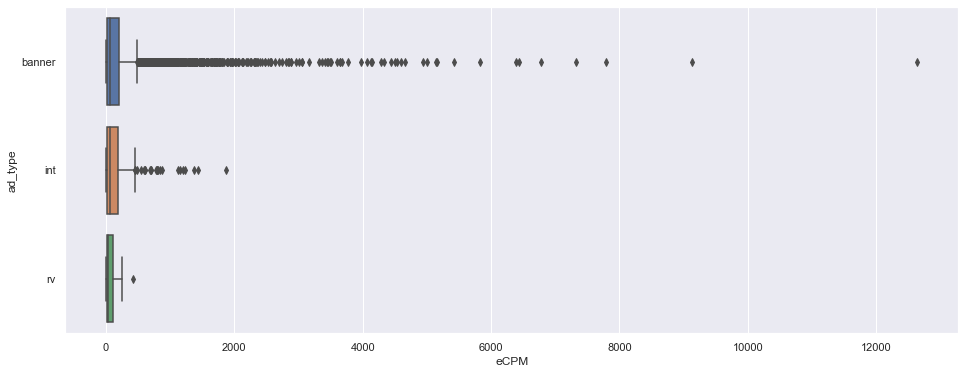

In [193]:
plt.figure(figsize=(16, 6))

sns.boxplot(x=df_by_user_sum['eCPM'], y=df['ad_type'], whis=1.5)
plt.show()

Интересные распределения суммарных поюзерных значений eCPM для каждого типа рекламы. У баннерной рекламы очень длинный хвост. Похоже на экспоненциальное распределение (как, впрочем, и остальные, но сильнее): как время ожидания следующего покупателя, что вполне соответствует действительности. Хотелось бы прояснить, почему такие разные хвосты.

Для статистического анализа возьму пока только 2 версии систем 10 и 12 для реклам типа Int

In [205]:
df_int_means_os12 = df_int.loc[df_int['os_version'] == '12'].eCPM
df_int_means_os10 = df_int.loc[df_int['os_version'] == '10'].eCPM
p_os_10_12 = stats.ttest_ind(df_int_means_os12, df_int_means_os10)[1]
print('Предположим: для рекламы типа int различия в распределении средних по eCPM не случайны. Проверим:')
print(f'p-value = {p_os_10_12:.6f}')

Предположим: для рекламы типа int различия в распределении средних по eCPM не случайны. Проверим:
p-value = 0.000230


Значит, вероятность того, что предположение неверно, очень мала. Значит, версия системы влияет на значение eCPM.